In [3]:
# 한글 폰트 //

import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image # 이미지 데이터 불러오고 처리하는 라이브러리

In [12]:
from tqdm import tqdm

total = []

for n in tqdm(range(1, 251, 30)):

    url = requests.get("https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%ED%95%9C%EA%B5%AD&p={}".format(n))
    html = BeautifulSoup(url.text)

    news = html.find("ul", class_='c-list-basic').find_all('div', class_='c-item-content')
    for i in news:
        title = i.find('div', class_ = 'item-title').text
        content = i.find('p', class_='conts-desc clamp-g2').text
        total.append([title, content])

        time.sleep(1)

100%|██████████| 9/9 [01:41<00:00, 11.30s/it]


In [13]:
len(total)

90

In [15]:
df = pd.DataFrame(total, columns = ['제목', '요약'])
df

,제목,요약
0,[데스크에서] “노래보다 음식 때문에 한국 갑니다”,"고심했는데 정답은 가까운 곳에 있었던 것이다. 우리의 식생활, ‘K푸드’다. K..."
1,"日 ‘스타라이트+ 2024’ 페스티벌 생중계, 한국서도 즐긴다",일본 ‘STARLIGHT+ 2024’ 페스티벌 포스터. Beyond LIVE 제...
2,한국 ‘잘파문화’ 스페인에 전해지다..한류 지속가능성[함영훈의 멋·맛·쉼],Z세대(1990년대 중반~2000년대 초반 태생)와 알파세대(2010년 전후 태...
3,매년 ‘건축계 노벨상’ 휩쓰는 일본...한국은 ‘0’명 굴욕,프리츠커상 수상자가 된 야마모토 리켄. 한국에서도 아파트와 타운하우스를 설계한 ...
4,"[클릭 e종목] ""한국, 제2 차이나 쇼크 대비 필요""",하이투자증권이 7일 한국 산업계가 중국 성장률 둔화와 한·중 교역구조 변화의 영...
...,...,...
85,뉴욕한국문화원 신청사 초대전에 조각가 존배,존배 전시 포스터 뉴욕한국문화원이 새로운 보금자리로 이전한 이후 첫번째 전시로 ...
86,"NCT WISH, 데뷔 첫 한국 음악방송 활동 돌입..'엠카' 출연","[스타뉴스 | 김수진 기자] NCT WISH, 데뷔 첫 한국 음악방송 활동 돌입..."
87,"SK가스, 한국통합물류협회와 택배업계 전용 멤버십 출시",[이데일리 하지나 기자] SK가스와 한국통합물류협회는 택배업계에 종사하는 1톤(...
88,"한국-덴마크, 녹색미래 위한 해상풍력사업 컨퍼런스 열어",매우 일치하는 만큼 해상풍력 발전과 그린수소 분야에서 협력 기회를 모색하기 바란...


In [19]:
import re

text = ''

for i in total:
    text += i[0]
    text += '\n'
    text += i[1]
    text += '\n'

len(text)

17472

In [24]:
box = re.findall("[가-힣]{2,}", text)
len(box)

3150

In [26]:
dic = {}

for i in box:
    if i in dic:
        dic[i] += 1
    else :
        dic[i] =1
dic

{'데스크에서': 1,
 '노래보다': 1,
 '음식': 1,
 '때문에': 2,
 '한국': 52,
 '갑니다': 1,
 '고심했는데': 1,
 '정답은': 1,
 '가까운': 2,
 '곳에': 1,
 '있었던': 1,
 '것이다': 1,
 '우리의': 1,
 '식생활': 1,
 '푸드': 1,
 '팝이나': 1,
 '드라마는': 1,
 '생각보다': 1,
 '확장성이': 1,
 '낮다': 1,
 '막상': 1,
 '한국에': 9,
 '오면': 1,
 '콘서트장을': 1,
 '가거나': 1,
 '촬영지를': 1,
 '찾는': 1,
 '정도밖에': 1,
 '없다': 2,
 '저작권': 1,
 '문제': 1,
 '팝은': 1,
 '길거리에서': 1,
 '쉽게': 1,
 '들을': 1,
 '수도': 1,
 '스타라이트': 1,
 '페스티벌': 3,
 '생중계': 1,
 '한국서도': 1,
 '즐긴다': 1,
 '일본': 5,
 '포스터': 7,
 '제공': 25,
 '무대를': 1,
 '한국에서도': 2,
 '만난다': 1,
 '최대': 1,
 '이동통신사': 1,
 '도코모': 2,
 '산하': 1,
 '엔터테인먼트': 1,
 '스튜디오': 1,
 '라이브': 1,
 '루미나리에': 1,
 '빛의': 1,
 '연출': 1,
 '글로벌': 2,
 '시장을': 1,
 '잘파문화': 1,
 '스페인에': 1,
 '전해지다': 1,
 '한류': 1,
 '지속가능성': 1,
 '함영훈의': 1,
 '세대': 1,
 '년대': 2,
 '중반': 1,
 '초반': 1,
 '태생': 2,
 '알파세대': 1,
 '전후': 1,
 '아우르는': 1,
 '잘파': 1,
 '세대라': 1,
 '불린다': 1,
 '한국의': 9,
 '잘파문화는': 1,
 '웹툰': 1,
 '미디어아트': 1,
 '폴리팝': 1,
 '매직아트': 1,
 '등을': 1,
 '있다': 5,
 '유럽내에서': 1,
 '컬쳐를': 1,
 '중심으로': 1,
 '한류의': 1,
 '확산이': 1,
 '비교적'

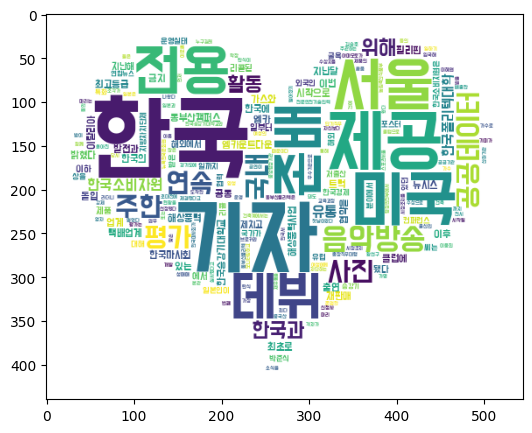

In [33]:
wc = WordCloud(font_path="BMDOHYEON_ttf.ttf", background_color='white', mask= img)

plt.figure(figsize = (10, 5))
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
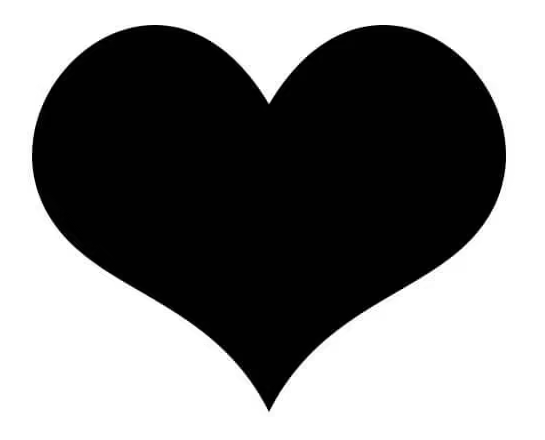

In [32]:
img = Image.open("하트.png") # 흰색에 가까울 수록 255, 0에 가까울 수록 검은색
img = np.array(img)
img